In [1]:
from pathlib import Path

import geopandas
import geopandas as gpd
import pandas
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# TODO whole overlapping period?

# U for Uber, T for T4c, O for OpenStreetMap
UBASEPATH = Path("/iarai/public/t4c/uber")
TBASEPATH = Path("/iarai/public/t4c/data_pipeline/release20221028_historic_uber")
OBASEPATH = Path("/iarai/public/t4c/osm")
CITY = "barcelona"
DAYTIME_START_HOUR = 8
DAYTIME_END_HOUR = 18
DAYTIME_HOURS = DAYTIME_END_HOUR - DAYTIME_START_HOUR

YEAR = 2020
MONTH = 2

# 2020-02-01 Sat
# 2020-02-02 Sun
# 2020-02-03 Mon
# 2020-02-04 Tue
# 2020-02-05 Wed
# 2020-02-06 Thu
# 2020-02-07 Fri

In [2]:
gen_gpkg = True

In [3]:
highway_ordering = [
    "motorway",
    "motorway_link",
    "trunk",
    "trunk_link",
    "primary",
    "primary_link",
    "secondary",
    "secondary_link",
    "tertiary",
    "tertiary_link",
    "unclassified",
    "residential",
    "living_street",
    "service",
    "cycleway",
    "road",
    "construction",
]

In [4]:
plt.rcParams["axes.labelsize"] = 24

In [5]:
# simplified_filter = lambda hw: hw not in ['residential', 'living_street', 'service', 'road']
simplified_filter = lambda hw: hw in [
    "motorway",
    "motorway_link",
    "trunk",
    "trunk_link",
    "primary",
    "primary_link",
    "secondary",
    "secondary_link",
    "tertiary",
    "tertiary_link",
]

In [6]:
def osm_color_palette():
    for c in ["#e892a2", "#e892a2", "#f9b29c", "#f9b29c", "#fcd6a4", "#fcd6a4", "#f7fabf", "#f7fabf"] + ["white"] * 99:
        yield c

## Load Uber segment speeds

In [7]:
uspeeds_df = pandas.read_parquet(UBASEPATH / f"movement-speeds-hourly-{CITY}-2020-2.parquet")
# uspeeds_df['speed_kph_mean'] = uspeeds_df['speed_mph_mean'] * 1.60934
uspeeds_df = uspeeds_df.rename(columns={"osm_start_node_id": "u", "osm_end_node_id": "v", "osm_way_id": "osmid"})
uspeeds_df["gkey"] = [f"{u}_{v}_{osmid}" for u, v, osmid in zip(uspeeds_df["u"], uspeeds_df["v"], uspeeds_df["osmid"])]
uspeeds_df

,year,month,day,hour,utc_timestamp,segment_id,start_junction_id,end_junction_id,osmid,u,v,speed_kph_mean,speed_kph_stddev,gkey
0,2020,2,18,21,2020-02-18T20:00:00.000Z,2c72d02f0a169894a1ab1c518761cc8ed782671e,cff3a52a4c4b3b4051e51519d8a9724c8823aa33,1bf52f16a370a1b42048ffa6d7db90c6df416190,237659851,30238017,30246860,42.992,15.530,30238017_30246860_237659851
1,2020,2,11,20,2020-02-11T19:00:00.000Z,2c72d02f0a169894a1ab1c518761cc8ed782671e,cff3a52a4c4b3b4051e51519d8a9724c8823aa33,1bf52f16a370a1b42048ffa6d7db90c6df416190,237659851,30238017,30246860,43.418,17.464,30238017_30246860_237659851
2,2020,2,16,15,2020-02-16T14:00:00.000Z,2c72d02f0a169894a1ab1c518761cc8ed782671e,cff3a52a4c4b3b4051e51519d8a9724c8823aa33,1bf52f16a370a1b42048ffa6d7db90c6df416190,237659851,30238017,30246860,45.918,19.958,30238017_30246860_237659851
3,2020,2,16,22,2020-02-16T21:00:00.000Z,2c72d02f0a169894a1ab1c518761cc8ed782671e,cff3a52a4c4b3b4051e51519d8a9724c8823aa33,1bf52f16a370a1b42048ffa6d7db90c6df416190,237659851,30238017,30246860,40.526,24.419,30238017_30246860_237659851
4,2020,2,20,21,2020-02-20T20:00:00.000Z,2c72d02f0a169894a1ab1c518761cc8ed782671e,cff3a52a4c4b3b4051e51519d8a9724c8823aa33,1bf52f16a370a1b42048ffa6d7db90c6df416190,237659851,30238017,30246860,30.575,13.414,30238017_30246860_237659851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74268,2020,2,16,16,2020-02-16T15:00:00.000Z,8c48ec71ed1df701458ad59510e198bc7233825b,9baf980625f0f0ebc8843f5320367db9a8cb8b1a,be68c37f4d777f9d7fb81d84a519ead45783a795,546607926,3134509191,797407467,29.769,15.495,3134509191_797407467_546607926
74269,2020,2,11,21,2020-02-11T20:00:00.000Z,8c48ec71ed1df701458ad59510e198bc7233825b,9baf980625f0f0ebc8843f5320367db9a8cb8b1a,be68c37f4d777f9d7fb81d84a519ead45783a795,546607926,3134509191,797407467,20.946,5.343,3134509191_797407467_546607926
74270,2020,2,21,21,2020-02-21T20:00:00.000Z,8c48ec71ed1df701458ad59510e198bc7233825b,9baf980625f0f0ebc8843f5320367db9a8cb8b1a,be68c37f4d777f9d7fb81d84a519ead45783a795,546607926,3134509191,797407467,29.160,5.030,3134509191_797407467_546607926
74271,2020,2,4,21,2020-02-04T20:00:00.000Z,60e2cd8549b53a80e03e08ba30bb884afb72891d,864b9b2a76f790661736a07753e07eb97ffd1c8b,ddc8760fdddd4f0e3f6102c212ec012f3c358823,127005742,307752466,307752470,34.715,6.384,307752466_307752470_127005742


## Load our segment speeds

In [8]:
tspeeds_l = []
for i in range(1, 8):
    f = TBASEPATH / "speed_classes" / CITY / f"speed_classes_{YEAR}-{MONTH:02d}-{i:02d}.parquet"
    print(f)
    df = pd.read_parquet(f)
    df["date"] = df["day"]
    df["year"] = YEAR
    df["month"] = MONTH
    df["day"] = i
    df["hour"] = df["t"] // 4
    df = (
        df[["u", "v", "gkey", "year", "month", "day", "hour", "volume_class", "volume", "median_speed_kph", "free_flow_kph"]]
        .groupby(by=["u", "v", "gkey", "year", "month", "day", "hour"])
        .mean()
        .reset_index()
    )
    tspeeds_l.append(df)
tspeeds_df = pandas.concat(tspeeds_l)
# tspeeds_df = tspeeds_df.rename(columns={'osmid': 'osm_way_id'})
tspeeds_df

/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-01.parquet
/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-02.parquet
/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-03.parquet
/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-04.parquet
/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-05.parquet
/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-06.parquet
/iarai/public/t4c/data_pipeline/release20221028_historic_uber/speed_classes/barcelona/speed_classes_2020-02-07.parquet


,u,v,gkey,year,month,day,hour,volume_class,volume,median_speed_kph,free_flow_kph
0,21638861,21638859,21638861_21638859_291731095,2020,2,1,8,1.000000,1.000000,29.647059,35.294118
1,21638861,21638859,21638861_21638859_291731095,2020,2,1,11,3.000000,4.500000,45.176471,35.294118
2,21638861,21638859,21638861_21638859_291731095,2020,2,1,12,5.000000,5.000000,31.764706,35.294118
3,21638861,21638859,21638861_21638859_291731095,2020,2,1,15,5.000000,12.500000,1.411765,35.294118
4,21638861,21638859,21638861_21638859_291731095,2020,2,1,16,5.000000,8.333333,0.627451,35.294118
...,...,...,...,...,...,...,...,...,...,...,...
68353,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,13,2.333333,5.000000,26.980392,33.647059
68354,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,14,5.000000,6.000000,9.882353,33.647059
68355,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,15,5.000000,17.000000,0.941176,33.647059
68356,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,16,5.000000,19.000000,5.411765,33.647059


In [9]:
u_ids = set(zip(uspeeds_df["u"], uspeeds_df["v"], uspeeds_df["gkey"]))
u_ids

{(269380670, 1840721007, '269380670_1840721007_237521119'),
 (2874232227, 126803368, '2874232227_126803368_293858819'),
 (260724027, 1375697911, '260724027_1375697911_208568868'),
 (5165633104, 3429547151, '5165633104_3429547151_448563711'),
 (30238198, 30246669, '30238198_30246669_591631504'),
 (359693522, 359693449, '359693522_359693449_135703115'),
 (915702746, 30243396, '915702746_30243396_237912795'),
 (302182415, 30618555, '302182415_30618555_25627331'),
 (178542533, 1479334948, '178542533_1479334948_134565973'),
 (301572269, 442540253, '301572269_442540253_295124098'),
 (1311619441, 3207273319, '1311619441_3207273319_116315098'),
 (530676956, 530676957, '530676956_530676957_45185735'),
 (969257515, 60200014, '969257515_60200014_83304235'),
 (1104387946, 1104387393, '1104387946_1104387393_33836437'),
 (126753810, 1601776198, '126753810_1601776198_555464843'),
 (1104437823, 1806244754, '1104437823_1806244754_95204704'),
 (30243057, 2764476452, '30243057_2764476452_449991624'),
 (3

In [10]:
t_ids = set(zip(tspeeds_df["u"], tspeeds_df["v"], tspeeds_df["gkey"]))
t_ids

{(269380670, 1840721007, '269380670_1840721007_237521119'),
 (2874232227, 126803368, '2874232227_126803368_293858819'),
 (260724027, 1375697911, '260724027_1375697911_208568868'),
 (5165633104, 3429547151, '5165633104_3429547151_448563711'),
 (30238198, 30246669, '30238198_30246669_591631504'),
 (359693522, 359693449, '359693522_359693449_135703115'),
 (915702746, 30243396, '915702746_30243396_237912795'),
 (302182415, 30618555, '302182415_30618555_25627331'),
 (301572269, 442540253, '301572269_442540253_295124098'),
 (1311619441, 3207273319, '1311619441_3207273319_116315098'),
 (530676956, 530676957, '530676956_530676957_45185735'),
 (969257515, 60200014, '969257515_60200014_83304235'),
 (1104387946, 1104387393, '1104387946_1104387393_33836437'),
 (126753810, 1601776198, '126753810_1601776198_555464843'),
 (1104437823, 1806244754, '1104437823_1806244754_95204704'),
 (30243057, 2764476452, '30243057_2764476452_449991624'),
 (30685340, 30243321, '30685340_30243321_262048904'),
 (9672274

In [11]:
assert t_ids.issubset(u_ids)

In [12]:
# for u,v in u_uv - t_uv:
#     print(f"https://www.openstreetmap.org/node/{u}")
#     print(f"https://www.openstreetmap.org/node/{v}")
#     break

## Restrict to daytime only

In [13]:
tspeeds_df = tspeeds_df[(tspeeds_df["hour"] >= DAYTIME_START_HOUR) & (tspeeds_df["hour"] < DAYTIME_END_HOUR)]
tspeeds_df

,u,v,gkey,year,month,day,hour,volume_class,volume,median_speed_kph,free_flow_kph
0,21638861,21638859,21638861_21638859_291731095,2020,2,1,8,1.000000,1.000000,29.647059,35.294118
1,21638861,21638859,21638861_21638859_291731095,2020,2,1,11,3.000000,4.500000,45.176471,35.294118
2,21638861,21638859,21638861_21638859_291731095,2020,2,1,12,5.000000,5.000000,31.764706,35.294118
3,21638861,21638859,21638861_21638859_291731095,2020,2,1,15,5.000000,12.500000,1.411765,35.294118
4,21638861,21638859,21638861_21638859_291731095,2020,2,1,16,5.000000,8.333333,0.627451,35.294118
...,...,...,...,...,...,...,...,...,...,...,...
68352,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,12,1.000000,1.000000,28.705882,33.647059
68353,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,13,2.333333,5.000000,26.980392,33.647059
68354,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,14,5.000000,6.000000,9.882353,33.647059
68355,6502276600,3679449104,6502276600_3679449104_695674740,2020,2,7,15,5.000000,17.000000,0.941176,33.647059


In [14]:
uspeeds_df = uspeeds_df[(uspeeds_df["hour"] >= DAYTIME_START_HOUR) & (uspeeds_df["hour"] < DAYTIME_END_HOUR)]
uspeeds_df

,year,month,day,hour,utc_timestamp,segment_id,start_junction_id,end_junction_id,osmid,u,v,speed_kph_mean,speed_kph_stddev,gkey
2,2020,2,16,15,2020-02-16T14:00:00.000Z,2c72d02f0a169894a1ab1c518761cc8ed782671e,cff3a52a4c4b3b4051e51519d8a9724c8823aa33,1bf52f16a370a1b42048ffa6d7db90c6df416190,237659851,30238017,30246860,45.918,19.958,30238017_30246860_237659851
20,2020,2,23,14,2020-02-23T13:00:00.000Z,1bdfab9fdaddfc7ddf43ad3ceb6f10ecbdd4c868,82d2025e4c88f1a0f1761ab2ed013cdd042092a2,29522c7349547493c38e0430d1ecab3c7c53b42a,78845282,92620219,312898582,66.059,8.457,92620219_312898582_78845282
37,2020,2,12,14,2020-02-12T13:00:00.000Z,1ca22b2e85dc758dfaf19a634a3464291558e775,0cc79609af44fcf6c64c24cb311f778c5b84efb1,f0fd52a2c46c636d56e953c6a9b2c4c791c95645,237725939,126798008,1311833061,23.724,16.625,126798008_1311833061_237725939
46,2020,2,16,14,2020-02-16T13:00:00.000Z,104215d848d7e156d934d2cc233d7a5f7bf0e929,d50e192441bd05eb20b88b73e37bebc4bd40f685,d92f347d6d9541bb0f74867f7c29702fbbd993e2,561549331,1390694381,1390694013,32.268,7.572,1390694381_1390694013_561549331
50,2020,2,16,15,2020-02-16T14:00:00.000Z,104215d848d7e156d934d2cc233d7a5f7bf0e929,d50e192441bd05eb20b88b73e37bebc4bd40f685,d92f347d6d9541bb0f74867f7c29702fbbd993e2,561549331,1390694381,1390694013,34.399,7.176,1390694381_1390694013_561549331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74244,2020,2,22,13,2020-02-22T12:00:00.000Z,f4650df872dbea0ffa7ad95402eef26ffabccbcc,1096869e74b5c75a8458837ac77ff4461980553f,0e858f9bf7c3ed7fb9ef86a96013708698635131,140001496,301572821,4793246800,29.823,9.253,301572821_4793246800_140001496
74248,2020,2,16,14,2020-02-16T13:00:00.000Z,f4650df872dbea0ffa7ad95402eef26ffabccbcc,1096869e74b5c75a8458837ac77ff4461980553f,0e858f9bf7c3ed7fb9ef86a96013708698635131,140001496,301572821,4793246800,44.847,16.372,301572821_4793246800_140001496
74249,2020,2,13,14,2020-02-13T13:00:00.000Z,f4650df872dbea0ffa7ad95402eef26ffabccbcc,1096869e74b5c75a8458837ac77ff4461980553f,0e858f9bf7c3ed7fb9ef86a96013708698635131,140001496,301572821,4793246800,39.412,12.429,301572821_4793246800_140001496
74260,2020,2,16,15,2020-02-16T14:00:00.000Z,f4650df872dbea0ffa7ad95402eef26ffabccbcc,1096869e74b5c75a8458837ac77ff4461980553f,0e858f9bf7c3ed7fb9ef86a96013708698635131,140001496,301572821,4793246800,28.581,22.482,301572821_4793246800_140001496


## Counts/densityfor both

In [15]:
ucounts = uspeeds_df.groupby(["u", "v", "gkey"]).agg(count=("speed_kph_mean", "count"), speed_kph_mean=("speed_kph_mean", "first")).reset_index()
ucounts

,u,v,gkey,count,speed_kph_mean
0,21638861,21638859,21638861_21638859_291731095,3,41.528
1,21638872,4229056910,21638872_4229056910_291731094,1,39.873
2,21638874,21638872,21638874_21638872_291731094,2,33.158
3,21638886,2952200683,21638886_2952200683_237790232,1,11.466
4,21638917,1401306391,21638917_1401306391_18510288,5,32.237
...,...,...,...,...,...
2482,6381043462,6381043454,6381043462_6381043454_29380279,1,10.662
2483,6395340810,559765968,6395340810_559765968_449991617,27,36.343
2484,6425898312,301573011,6425898312_301573011_295124098,1,16.184
2485,6434246887,998615843,6434246887_998615843_237805224,7,53.260


In [16]:
tcounts = (
    tspeeds_df.groupby(["u", "v", "gkey"])
    .agg(count=("median_speed_kph", "count"), median_speed_kph=("median_speed_kph", "first"), mean_volume=("volume", "mean"))
    .reset_index()[["u", "v", "gkey", "count", "median_speed_kph", "mean_volume"]]
)
tcounts

,u,v,gkey,count,median_speed_kph,mean_volume
0,21638861,21638859,21638861_21638859_291731095,47,29.647059,7.762411
1,21638872,4229056910,21638872_4229056910_291731094,30,54.352941,5.922222
2,21638874,21638872,21638874_21638872_291731094,40,39.764706,5.712500
3,21638886,2952200683,21638886_2952200683_237790232,56,18.941176,15.043155
4,21638891,533663031,21638891_533663031_18512190,58,16.470588,9.432471
...,...,...,...,...,...,...
5937,6485217417,380722287,6485217417_380722287_576957404,41,11.764706,4.762195
5938,6485217427,425763064,6485217427_425763064_36005986,61,45.647059,5.687158
5939,6486942738,434451638,6486942738_434451638_37286986,43,72.000000,5.629845
5940,6487028700,412453967,6487028700_412453967_662919197,29,19.764706,12.586207


In [17]:
num_slots_t_speeds = len(set(zip(tspeeds_df["year"], tspeeds_df["month"], tspeeds_df["day"], tspeeds_df["hour"])))
num_slots_t_speeds

70

In [18]:
num_slots_t_speeds / DAYTIME_HOURS

7.0

In [19]:
assert num_slots_t_speeds % DAYTIME_HOURS == 0

In [20]:
tcounts["density"] = tcounts["count"] / num_slots_t_speeds
tcounts

,u,v,gkey,count,median_speed_kph,mean_volume,density
0,21638861,21638859,21638861_21638859_291731095,47,29.647059,7.762411,0.671429
1,21638872,4229056910,21638872_4229056910_291731094,30,54.352941,5.922222,0.428571
2,21638874,21638872,21638874_21638872_291731094,40,39.764706,5.712500,0.571429
3,21638886,2952200683,21638886_2952200683_237790232,56,18.941176,15.043155,0.800000
4,21638891,533663031,21638891_533663031_18512190,58,16.470588,9.432471,0.828571
...,...,...,...,...,...,...,...
5937,6485217417,380722287,6485217417_380722287_576957404,41,11.764706,4.762195,0.585714
5938,6485217427,425763064,6485217427_425763064_36005986,61,45.647059,5.687158,0.871429
5939,6486942738,434451638,6486942738_434451638_37286986,43,72.000000,5.629845,0.614286
5940,6487028700,412453967,6487028700_412453967_662919197,29,19.764706,12.586207,0.414286


In [21]:
len(tcounts)

5942

In [22]:
(tcounts["count"] == 0).sum()

0

In [23]:
slots_u_speeds = set(zip(uspeeds_df["year"], uspeeds_df["month"], uspeeds_df["day"], uspeeds_df["hour"]))
slots_u_speeds

{(2020, 2, 1, 13),
 (2020, 2, 1, 14),
 (2020, 2, 1, 15),
 (2020, 2, 1, 16),
 (2020, 2, 1, 17),
 (2020, 2, 2, 13),
 (2020, 2, 2, 14),
 (2020, 2, 2, 15),
 (2020, 2, 2, 16),
 (2020, 2, 2, 17),
 (2020, 2, 3, 13),
 (2020, 2, 3, 14),
 (2020, 2, 4, 13),
 (2020, 2, 4, 14),
 (2020, 2, 5, 12),
 (2020, 2, 5, 13),
 (2020, 2, 5, 14),
 (2020, 2, 5, 16),
 (2020, 2, 6, 13),
 (2020, 2, 6, 14),
 (2020, 2, 6, 15),
 (2020, 2, 7, 13),
 (2020, 2, 7, 14),
 (2020, 2, 7, 15),
 (2020, 2, 7, 16),
 (2020, 2, 7, 17),
 (2020, 2, 8, 13),
 (2020, 2, 8, 14),
 (2020, 2, 8, 15),
 (2020, 2, 8, 16),
 (2020, 2, 8, 17),
 (2020, 2, 9, 13),
 (2020, 2, 9, 14),
 (2020, 2, 9, 15),
 (2020, 2, 9, 16),
 (2020, 2, 9, 17),
 (2020, 2, 10, 13),
 (2020, 2, 10, 14),
 (2020, 2, 10, 15),
 (2020, 2, 10, 16),
 (2020, 2, 10, 17),
 (2020, 2, 11, 12),
 (2020, 2, 11, 13),
 (2020, 2, 11, 14),
 (2020, 2, 11, 15),
 (2020, 2, 11, 16),
 (2020, 2, 12, 13),
 (2020, 2, 12, 14),
 (2020, 2, 12, 15),
 (2020, 2, 12, 16),
 (2020, 2, 12, 17),
 (2020, 2, 13, 1

In [24]:
num_slots_u_speeds = len(slots_u_speeds)
num_slots_u_speeds

143

In [25]:
num_slots_u_speeds / DAYTIME_HOURS

14.3

In [26]:
# Barcelona seems not to have all hours covered in the month we're looking at
# assert num_slots_u_speeds % DAYTIME_HOURS == 0

In [27]:
ucounts["density"] = ucounts["count"] / num_slots_u_speeds
ucounts

,u,v,gkey,count,speed_kph_mean,density
0,21638861,21638859,21638861_21638859_291731095,3,41.528,0.020979
1,21638872,4229056910,21638872_4229056910_291731094,1,39.873,0.006993
2,21638874,21638872,21638874_21638872_291731094,2,33.158,0.013986
3,21638886,2952200683,21638886_2952200683_237790232,1,11.466,0.006993
4,21638917,1401306391,21638917_1401306391_18510288,5,32.237,0.034965
...,...,...,...,...,...,...
2482,6381043462,6381043454,6381043462_6381043454_29380279,1,10.662,0.006993
2483,6395340810,559765968,6395340810_559765968_449991617,27,36.343,0.188811
2484,6425898312,301573011,6425898312_301573011_295124098,1,16.184,0.006993
2485,6434246887,998615843,6434246887_998615843_237805224,7,53.260,0.048951


In [28]:
len(ucounts)

2487

In [29]:
(ucounts["count"] == 0).sum()

0

## Merge with historic OSM data for UBER

In [30]:
gdf_nodes = gpd.read_parquet(TBASEPATH / "road_graph" / CITY / "road_graph_nodes.parquet")
gdf_nodes

,node_id,x,y,geometry
0,21638859,2.188693,41.376347,POINT (2.18869 41.37635)
1,21638861,2.188040,41.378011,POINT (2.18804 41.37801)
2,21638872,2.187738,41.378797,POINT (2.18774 41.37880)
3,21638874,2.187119,41.380371,POINT (2.18712 41.38037)
4,21638886,2.185963,41.381278,POINT (2.18596 41.38128)
...,...,...,...,...
5525,6485217427,2.185904,41.500209,POINT (2.18590 41.50021)
5526,6485528262,2.030090,41.335952,POINT (2.03009 41.33595)
5527,6486942738,2.208156,41.434742,POINT (2.20816 41.43474)
5528,6487028700,2.142968,41.413227,POINT (2.14297 41.41323)


In [31]:
gdf_edges = gpd.read_parquet(TBASEPATH / "road_graph" / CITY / "road_graph_edges.parquet")
gdf_edges

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,length_meters,geometry,name
0,21638861_21638859_291731095,21638861,21638859,291731095,50.0,50,residential,,,,198.710412,"LINESTRING (2.18804 41.37801, 2.18821 41.37757...",Passeig de Joan de Borbó
1,21638872_4229056910_291731094,21638872,4229056910,291731094,50.0,50,tertiary,,,,83.740778,"LINESTRING (2.18774 41.37880, 2.18801 41.37809)",Passeig de Joan de Borbó
2,21638874_21638872_291731094,21638874,21638872,291731094,50.0,50,tertiary,,,,187.993767,"LINESTRING (2.18712 41.38037, 2.18715 41.38029...",Passeig de Joan de Borbó
3,21638886_2952200683_237790232,21638886,2952200683,237790232,50.0,50,tertiary,,,,80.120100,"LINESTRING (2.18596 41.38128, 2.18638 41.38108...",Passeig de Joan de Borbó
4,21638891_533663031_18512190,21638891,533663031,18512190,50.0,50,tertiary,,,,177.556771,"LINESTRING (2.18319 41.38260, 2.18313 41.38252...",Passeig d'Isabel II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,6485217417_380722287_576957404,6485217417,380722287,576957404,50.0,50,tertiary,,,,60.841548,"LINESTRING (2.18607 41.50057, 2.18633 41.50105)",Carretera de Barcelona a Puigcerdá
5939,6485217427_425763064_36005986,6485217427,425763064,36005986,50.0,50,tertiary,,,,31.372892,"LINESTRING (2.18590 41.50021, 2.18602 41.50047)",Carrer Pla de Matabous
5940,6486942738_434451638_37286986,6486942738,434451638,37286986,50.0,50,tertiary,,,,430.706510,"LINESTRING (2.20816 41.43474, 2.20860 41.43526...",pont del Molinet
5941,6487028700_412453967_662919197,6487028700,412453967,662919197,50.0,50,secondary,,,,177.087661,"LINESTRING (2.14297 41.41323, 2.14297 41.41324...",Avinguda de Vallcarca


In [32]:
gdf_edges = gdf_edges.merge(gdf_nodes, left_on="u", right_on="node_id", suffixes=["", "_u"]).merge(
    gdf_nodes, left_on="v", right_on="node_id", suffixes=["", "_v"]
)
gdf_edges.rename(columns={"x": "x_u", "y": "y_u"}, inplace=True)
del gdf_edges["geometry_u"]
del gdf_edges["geometry_v"]
gdf_edges

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,length_meters,geometry,name,node_id,x_u,y_u,node_id_v,x_v,y_v
0,21638861_21638859_291731095,21638861,21638859,291731095,50.0,50,residential,,,,198.710412,"LINESTRING (2.18804 41.37801, 2.18821 41.37757...",Passeig de Joan de Borbó,21638861,2.188040,41.378011,21638859,2.188693,41.376347
1,21638872_4229056910_291731094,21638872,4229056910,291731094,50.0,50,tertiary,,,,83.740778,"LINESTRING (2.18774 41.37880, 2.18801 41.37809)",Passeig de Joan de Borbó,21638872,2.187738,41.378797,4229056910,2.188009,41.378093
2,21638874_21638872_291731094,21638874,21638872,291731094,50.0,50,tertiary,,,,187.993767,"LINESTRING (2.18712 41.38037, 2.18715 41.38029...",Passeig de Joan de Borbó,21638874,2.187119,41.380371,21638872,2.187738,41.378797
3,21638886_2952200683_237790232,21638886,2952200683,237790232,50.0,50,tertiary,,,,80.120100,"LINESTRING (2.18596 41.38128, 2.18638 41.38108...",Passeig de Joan de Borbó,21638886,2.185963,41.381278,2952200683,2.186608,41.380957
4,21638891_533663031_18512190,21638891,533663031,18512190,50.0,50,tertiary,,,,177.556771,"LINESTRING (2.18319 41.38260, 2.18313 41.38252...",Passeig d'Isabel II,21638891,2.183192,41.382603,533663031,2.182166,41.381379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,6485217417_380722287_576957404,6485217417,380722287,576957404,50.0,50,tertiary,,,,60.841548,"LINESTRING (2.18607 41.50057, 2.18633 41.50105)",Carretera de Barcelona a Puigcerdá,6485217417,2.186074,41.500567,380722287,2.186331,41.501051
5939,6485217427_425763064_36005986,6485217427,425763064,36005986,50.0,50,tertiary,,,,31.372892,"LINESTRING (2.18590 41.50021, 2.18602 41.50047)",Carrer Pla de Matabous,6485217427,2.185904,41.500209,425763064,2.186021,41.500466
5940,6486942738_434451638_37286986,6486942738,434451638,37286986,50.0,50,tertiary,,,,430.706510,"LINESTRING (2.20816 41.43474, 2.20860 41.43526...",pont del Molinet,6486942738,2.208156,41.434742,434451638,2.211516,41.436670
5941,6487028700_412453967_662919197,6487028700,412453967,662919197,50.0,50,secondary,,,,177.087661,"LINESTRING (2.14297 41.41323, 2.14297 41.41324...",Avinguda de Vallcarca,6487028700,2.142968,41.413227,412453967,2.142776,41.414809


In [33]:
# Barcelona
y_min, y_max, x_min, x_max = 41.25300, 41.74800, 1.92500, 2.36100

In [34]:
def in_bb(x, y):
    return (x_min <= x <= x_max) and (y_min <= y <= y_max)

In [35]:
gdf_edges["in_bb"] = [
    (in_bb(x_u, y_u) or in_bb(x_v, y_v)) for x_u, y_u, x_v, y_v in zip(gdf_edges["x_u"], gdf_edges["y_u"], gdf_edges["x_v"], gdf_edges["y_v"])
]

In [36]:
gdf_edges.groupby("in_bb").agg(count=("gkey", "count"))

,count
in_bb,
True,5943


In [37]:
gdf_ucounts_merged = gdf_edges.merge(ucounts, on=["u", "v", "gkey"], how="left")
gdf_ucounts_merged[["count", "density"]] = gdf_ucounts_merged[["count", "density"]].fillna(0.0)
gdf_ucounts_merged

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,node_id,x_u,y_u,node_id_v,x_v,y_v,in_bb,count,speed_kph_mean,density
0,21638861_21638859_291731095,21638861,21638859,291731095,50.0,50,residential,,,,...,21638861,2.188040,41.378011,21638859,2.188693,41.376347,True,3.0,41.528,0.020979
1,21638872_4229056910_291731094,21638872,4229056910,291731094,50.0,50,tertiary,,,,...,21638872,2.187738,41.378797,4229056910,2.188009,41.378093,True,1.0,39.873,0.006993
2,21638874_21638872_291731094,21638874,21638872,291731094,50.0,50,tertiary,,,,...,21638874,2.187119,41.380371,21638872,2.187738,41.378797,True,2.0,33.158,0.013986
3,21638886_2952200683_237790232,21638886,2952200683,237790232,50.0,50,tertiary,,,,...,21638886,2.185963,41.381278,2952200683,2.186608,41.380957,True,1.0,11.466,0.006993
4,21638891_533663031_18512190,21638891,533663031,18512190,50.0,50,tertiary,,,,...,21638891,2.183192,41.382603,533663031,2.182166,41.381379,True,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,6485217417_380722287_576957404,6485217417,380722287,576957404,50.0,50,tertiary,,,,...,6485217417,2.186074,41.500567,380722287,2.186331,41.501051,True,0.0,NaN,0.000000
5939,6485217427_425763064_36005986,6485217427,425763064,36005986,50.0,50,tertiary,,,,...,6485217427,2.185904,41.500209,425763064,2.186021,41.500466,True,0.0,NaN,0.000000
5940,6486942738_434451638_37286986,6486942738,434451638,37286986,50.0,50,tertiary,,,,...,6486942738,2.208156,41.434742,434451638,2.211516,41.436670,True,1.0,56.498,0.006993
5941,6487028700_412453967_662919197,6487028700,412453967,662919197,50.0,50,secondary,,,,...,6487028700,2.142968,41.413227,412453967,2.142776,41.414809,True,0.0,NaN,0.000000


In [38]:
assert type(gdf_ucounts_merged) == geopandas.geodataframe.GeoDataFrame

In [39]:
gdf_tcounts_merged = gdf_edges.merge(tcounts, on=["u", "v", "gkey"], how="left")
gdf_tcounts_merged[["count", "density"]] = gdf_tcounts_merged[["count", "density"]].fillna(0.0)
gdf_tcounts_merged

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,x_u,y_u,node_id_v,x_v,y_v,in_bb,count,median_speed_kph,mean_volume,density
0,21638861_21638859_291731095,21638861,21638859,291731095,50.0,50,residential,,,,...,2.188040,41.378011,21638859,2.188693,41.376347,True,47.0,29.647059,7.762411,0.671429
1,21638872_4229056910_291731094,21638872,4229056910,291731094,50.0,50,tertiary,,,,...,2.187738,41.378797,4229056910,2.188009,41.378093,True,30.0,54.352941,5.922222,0.428571
2,21638874_21638872_291731094,21638874,21638872,291731094,50.0,50,tertiary,,,,...,2.187119,41.380371,21638872,2.187738,41.378797,True,40.0,39.764706,5.712500,0.571429
3,21638886_2952200683_237790232,21638886,2952200683,237790232,50.0,50,tertiary,,,,...,2.185963,41.381278,2952200683,2.186608,41.380957,True,56.0,18.941176,15.043155,0.800000
4,21638891_533663031_18512190,21638891,533663031,18512190,50.0,50,tertiary,,,,...,2.183192,41.382603,533663031,2.182166,41.381379,True,58.0,16.470588,9.432471,0.828571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,6485217417_380722287_576957404,6485217417,380722287,576957404,50.0,50,tertiary,,,,...,2.186074,41.500567,380722287,2.186331,41.501051,True,41.0,11.764706,4.762195,0.585714
5939,6485217427_425763064_36005986,6485217427,425763064,36005986,50.0,50,tertiary,,,,...,2.185904,41.500209,425763064,2.186021,41.500466,True,61.0,45.647059,5.687158,0.871429
5940,6486942738_434451638_37286986,6486942738,434451638,37286986,50.0,50,tertiary,,,,...,2.208156,41.434742,434451638,2.211516,41.436670,True,43.0,72.000000,5.629845,0.614286
5941,6487028700_412453967_662919197,6487028700,412453967,662919197,50.0,50,secondary,,,,...,2.142968,41.413227,412453967,2.142776,41.414809,True,29.0,19.764706,12.586207,0.414286


### Write counts/density to parquet/gpkg

In [40]:
if gen_gpkg:
    gdf_ucounts_merged.to_parquet(f"{CITY}_ucounts.parquet")
    gdf_ucounts_merged.to_file(f"{CITY}_ucounts.gpkg", driver="GPKG", layer="edges")

In [41]:
if gen_gpkg:
    gdf_tcounts_merged.to_parquet(f"{CITY}_tcounts.parquet")
    gdf_tcounts_merged.to_file(f"{CITY}_tcounts.gpkg", driver="GPKG", layer="edges")

## Density differences

In [42]:
gdf_ut_counts_merged = gdf_tcounts_merged.merge(gdf_ucounts_merged, on=["u", "v", "gkey"], suffixes=["", "_u"], how="outer")
# workaround (if we use suffixes =["_t", "_u"]), we get a plain pandas frame...
gdf_ut_counts_merged.rename(columns={"density": "density_t", "count": "count_t"}, inplace=True)
gdf_ut_counts_merged[["count_t", "density_t"]] = gdf_ut_counts_merged[["count_t", "density_t"]].fillna(0.0)
gdf_ut_counts_merged["density_diff"] = gdf_ut_counts_merged["density_t"] - gdf_ut_counts_merged["density_u"]
del gdf_ut_counts_merged["geometry_u"]
gdf_ut_counts_merged

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,x_u_u,y_u_u,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff
0,21638861_21638859_291731095,21638861,21638859,291731095,50.0,50,residential,,,,...,2.188040,41.378011,21638859,2.188693,41.376347,True,3.0,41.528,0.020979,0.650450
1,21638872_4229056910_291731094,21638872,4229056910,291731094,50.0,50,tertiary,,,,...,2.187738,41.378797,4229056910,2.188009,41.378093,True,1.0,39.873,0.006993,0.421578
2,21638874_21638872_291731094,21638874,21638872,291731094,50.0,50,tertiary,,,,...,2.187119,41.380371,21638872,2.187738,41.378797,True,2.0,33.158,0.013986,0.557443
3,21638886_2952200683_237790232,21638886,2952200683,237790232,50.0,50,tertiary,,,,...,2.185963,41.381278,2952200683,2.186608,41.380957,True,1.0,11.466,0.006993,0.793007
4,21638891_533663031_18512190,21638891,533663031,18512190,50.0,50,tertiary,,,,...,2.183192,41.382603,533663031,2.182166,41.381379,True,0.0,NaN,0.000000,0.828571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,6485217417_380722287_576957404,6485217417,380722287,576957404,50.0,50,tertiary,,,,...,2.186074,41.500567,380722287,2.186331,41.501051,True,0.0,NaN,0.000000,0.585714
5939,6485217427_425763064_36005986,6485217427,425763064,36005986,50.0,50,tertiary,,,,...,2.185904,41.500209,425763064,2.186021,41.500466,True,0.0,NaN,0.000000,0.871429
5940,6486942738_434451638_37286986,6486942738,434451638,37286986,50.0,50,tertiary,,,,...,2.208156,41.434742,434451638,2.211516,41.436670,True,1.0,56.498,0.006993,0.607293
5941,6487028700_412453967_662919197,6487028700,412453967,662919197,50.0,50,secondary,,,,...,2.142968,41.413227,412453967,2.142776,41.414809,True,0.0,NaN,0.000000,0.414286


In [43]:
gdf_ut_counts_merged["in_bb"] = [
    (in_bb(x_u, y_u) or in_bb(x_v, y_v))
    for x_u, y_u, x_v, y_v in zip(gdf_ut_counts_merged["x_u"], gdf_ut_counts_merged["y_u"], gdf_ut_counts_merged["x_v"], gdf_ut_counts_merged["y_v"])
]

In [44]:
gdf_ut_counts_merged["sort_key"] = [highway_ordering.index(hw) for hw in gdf_ut_counts_merged["highway"]]
gdf_ut_counts_merged = gdf_ut_counts_merged.sort_values("sort_key")

In [45]:
assert gdf_ut_counts_merged["density_u"].isnull().sum() == 0
assert gdf_ut_counts_merged["density_t"].isnull().sum() == 0
assert type(gdf_ut_counts_merged) == geopandas.geodataframe.GeoDataFrame

In [46]:
if gen_gpkg:
    gdf_ut_counts_merged.to_parquet(f"{CITY}_utcounts.parquet")
    gdf_ut_counts_merged.to_file(f"{CITY}_utcounts.gpkg", driver="GPKG", layer="edges")

In [47]:
gdf_ut_counts_merged_by_hw_in_bb = (
    gdf_ut_counts_merged[gdf_ut_counts_merged["in_bb"] == True]
    .groupby("highway")
    .agg(count=("density_diff", "count"), mean_density_diff=("density_diff", "mean"))
    .reset_index()
)
gdf_ut_counts_merged_by_hw_in_bb["sort_key"] = [highway_ordering.index(hw) for hw in gdf_ut_counts_merged_by_hw_in_bb["highway"]]
gdf_ut_counts_merged_by_hw_in_bb = gdf_ut_counts_merged_by_hw_in_bb.sort_values("sort_key")
gdf_ut_counts_merged_by_hw_in_bb

,highway,count,mean_density_diff,sort_key
1,motorway,16,0.918750,0
2,motorway_link,3,0.909524,1
10,trunk,56,0.966098,2
11,trunk_link,44,0.974192,3
3,primary,709,0.727284,4
4,primary_link,216,0.814425,5
6,secondary,1278,0.623474,6
7,secondary_link,92,0.627167,7
8,tertiary,2014,0.485597,8
9,tertiary_link,130,0.613013,9


In [48]:
gdf_ut_counts_merged

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,y_u_u,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key
4695,1771334963_242934130_294049053,1771334963,242934130,294049053,80.0,80,motorway,,,,...,41.336557,242934130,2.099287,41.337590,True,0.0,NaN,0.000000,0.971429,0
1516,206346586_209106801_180274902,206346586,209106801,180274902,90.0,,motorway,,,,...,41.290874,209106801,2.002229,41.288638,True,0.0,NaN,0.000000,0.957143,0
5453,4353325973_206343940_19918156,4353325973,206343940,19918156,120.0,120,motorway,,,,...,41.301636,206343940,2.020845,41.299651,True,0.0,NaN,0.000000,0.928571,0
1552,208606457_2518375292_294713039,208606457,2518375292,294713039,80.0,80,motorway,,,,...,41.339122,2518375292,2.100841,41.338940,True,0.0,NaN,0.000000,0.914286,0
1634,215752952_209108780_19920168,215752952,209108780,19920168,90.0,,motorway,,,,...,41.285258,209108780,1.996582,41.284962,True,0.0,NaN,0.000000,0.928571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,1695282631_1695282667_157321756,1695282631,1695282667,157321756,30.0,30,living_street,,,,...,41.429620,1695282667,2.167435,41.429808,True,0.0,NaN,0.000000,0.085714,12
484,3236553582_442540239_116343002,3236553582,442540239,116343002,10.0,10,living_street,,,,...,41.393843,442540239,2.162863,41.394052,True,0.0,NaN,0.000000,0.814286,12
4219,3236553566_442540242_295281243,3236553566,442540242,295281243,10.0,10,living_street,,,,...,41.395651,442540242,2.160671,41.395833,True,1.0,8.346,0.006993,0.721578,12
2866,429572903_5301259039_548762348,429572903,5301259039,548762348,30.0,30,living_street,,,,...,41.450887,5301259039,2.220328,41.450744,True,2.0,26.247,0.013986,-0.013986,12


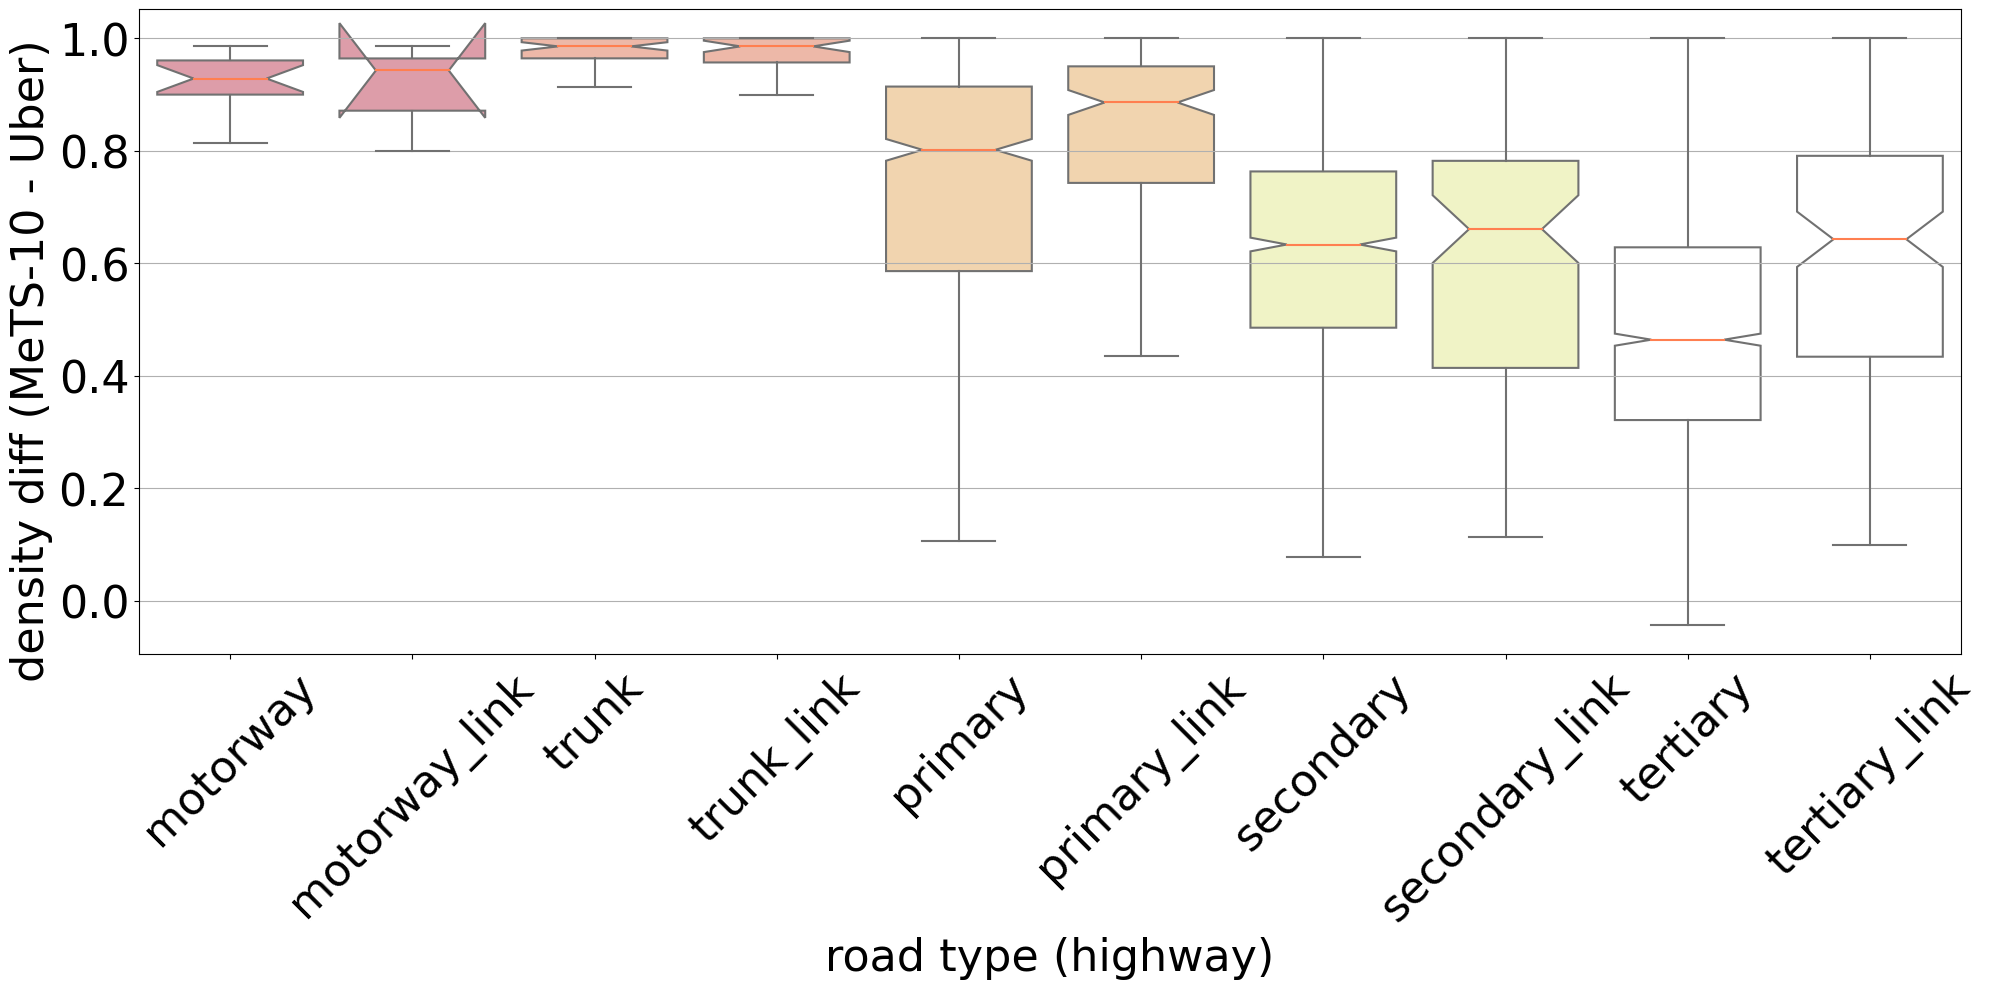

In [49]:
plt.rcParams["axes.labelsize"] = 32
fig, ax = plt.subplots(1, figsize=(20, 10), tight_layout=True)

sns.boxplot(
    gdf_ut_counts_merged[(gdf_ut_counts_merged["in_bb"] == True) & ([simplified_filter(hw) for hw in gdf_ut_counts_merged["highway"]])],
    x="highway",
    y="density_diff",
    notch=True,
    sym="",
    palette=osm_color_palette(),
    medianprops={"color": "coral"},
    ax=ax,
)
# plt.rcParams["axes.labelsize"] = 24
ax.tick_params(axis="x", which="major", labelsize=24, rotation=45)
ax.tick_params(axis="y", which="major", labelsize=24)
ax.tick_params(axis="x", which="major", labelsize=32, rotation=45)
ax.tick_params(axis="y", which="major", labelsize=32)
ax.grid(axis="y")
ax.set(xlabel="road type (highway)", ylabel="density diff (MeTS-10 - Uber)    ")
plt.savefig(f"{CITY}_Uber_density_diff_barplot.pdf")

In [50]:
# TODO do we need full area at all?

## Density histograms and stats

In [51]:
# instead of un/pivoting.....
ucounts["src"] = "u"
tcounts["src"] = "t"
counts_all = pd.concat([ucounts.rename(columns={"speed_kph_mean": "speed"}), tcounts.rename(columns={"median_speed_kph": "speed"})])
counts_all = counts_all.merge(gdf_edges, on=["u", "v", "gkey"])
counts_all["sort_key"] = [highway_ordering.index(hw) for hw in counts_all["highway"]]
counts_all = counts_all.sort_values("sort_key")
counts_all["matching"] = [(u, v, gkey) in t_ids for u, v, gkey in zip(counts_all["u"], counts_all["v"], counts_all["gkey"])]

## Density histogram for both

In [52]:
def plot_and_stats(df, density_attr, speed_attr):
    fig, axs = plt.subplots(2, figsize=(10, 5), tight_layout=True)
    axs[0].hist(df[density_attr], bins=10)
    axs[0].set_xlabel(density_attr)
    axs[1].hist(df[speed_attr], bins=48)
    axs[1].set_xlabel(speed_attr)
    df_gr = df.groupby("highway").agg(
        {
            density_attr: ["count", "mean", "median", "min", "max", "std"],
            speed_attr: ["mean", "median", "min", "max", "std"],
            "speed_kph": ["mean", "median", "min", "max", "std"],
            "length_meters": ["mean", "median", "min", "max", "std"],
        }
    )
    df_gr["sort_key"] = [highway_ordering.index(hw) for hw in df_gr.reset_index()["highway"]]
    display(df_gr.sort_values("sort_key"))

### density over full area

<AxesSubplot: xlabel='highway', ylabel='density'>

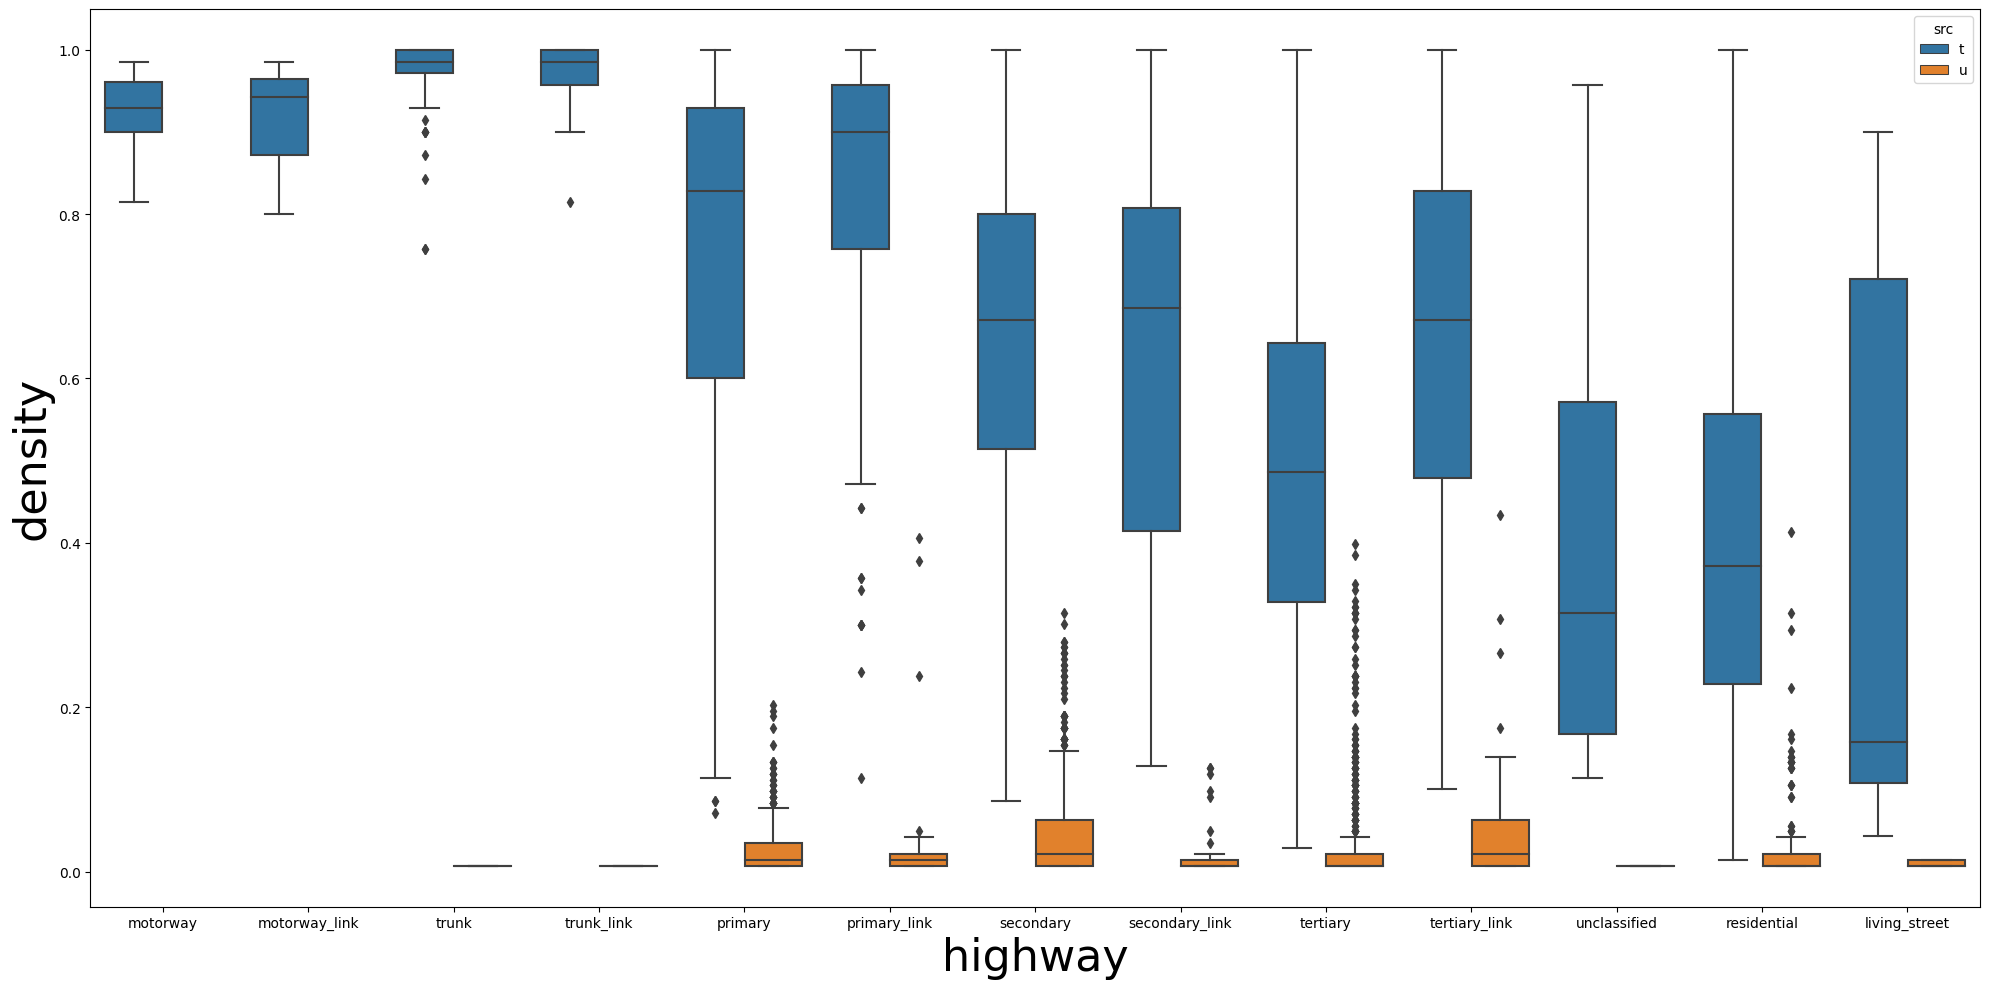

In [53]:
fig, ax = plt.subplots(1, figsize=(20, 10), tight_layout=True)
sns.boxplot(counts_all, x="highway", y="density", hue="src", ax=ax)
# TODO this looks fishy: motorway over full areay t should have 0 for everything ourside of the box - outer join?!

#### full area Uber

density_u                                               \
                   count      mean    median  min       max       std   
highway                                                                 
motorway              16  0.000000  0.000000  0.0  0.000000  0.000000   
motorway_link          3  0.000000  0.000000  0.0  0.000000  0.000000   
trunk                 56  0.001249  0.000000  0.0  0.006993  0.002703   
trunk_link            44  0.000159  0.000000  0.0  0.006993  0.001054   
primary              709  0.017044  0.006993  0.0  0.202797  0.029273   
primary_link         216  0.012691  0.000000  0.0  0.405594  0.041431   
secondary           1278  0.027107  0.006993  0.0  0.314685  0.048163   
secondary_link        92  0.010566  0.000000  0.0  0.125874  0.025741   
tertiary            2014  0.012049  0.000000  0.0  0.398601  0.040516   
tertiary_link        130  0.025229  0.000000  0.0  0.433566  0.059437   
unclassified          20  0.001049  0.000000  0.0  0.006993  0.002562   
residential         1341  0.006425  0.000000  0.0  0.412587  0.024310   
living_street         24  0.004079  0.000000  0.0  0.013986  0.005423   

               speed_kph_mean                           ... speed_kph        \
                         mean   median     min     max  ...    median   min   
highway                                                 ...                   
motorway                  NaN      NaN     NaN     NaN  ...      90.0  80.0   
motorway_link             NaN      NaN     NaN     NaN  ...      60.0  50.0   
trunk               65.865500  65.8920  61.935  68.795  ...      80.0  60.0   
trunk_link          57.055000  57.0550  57.055  57.055  ...      57.4  40.0   
primary             37.717107  38.2040   4.178  67.279  ...      50.0  20.0   
primary_link        31.051412  31.2715   7.084  51.901  ...      50.0  20.0   
secondary           33.689078  34.1740   5.055  65.376  ...      50.0  30.0   
secondary_link      31.836667  31.6550   9.058  50.352  ...      50.0  30.0   
tertiary            31.232502  30.4830   6.131  61.479  ...      50.0  20.0   
tertiary_link       28.894000  29.4505   5.755  47.608  ...      50.0  30.0   
unclassified        59.331667  56.9670  53.025  68.003  ...      41.4  30.0   
residential         27.384196  27.4460   6.285  55.862  ...      38.6  10.0   
living_street       17.950000  17.0315   8.346  26.247  ...      16.3  10.0   

                                 length_meters                         \
                  max        std          mean      median        min   
highway                                                                 
motorway        120.0  10.954451    225.766332  133.156994  24.177125   
motorway_link    60.0   5.773503    202.830347  196.906729  75.856949   
trunk           100.0   6.440742    212.769982  130.620254   5.661998   
trunk_link       80.0   9.947162    122.548649   90.083563  18.189738   
primary          60.0   2.482510     83.534679   68.965140   2.046653   
primary_link     80.0   7.303465     71.612674   44.503463   2.692792   
secondary        60.0   1.467789     86.792288   68.023448   2.940861   
secondary_link   50.0   3.220432     52.331917   32.110282   0.552173   
tertiary         80.0   2.635472     73.071403   56.040118   2.327827   
tertiary_link    50.0   2.994365     67.622854   33.399734   2.700348   
unclassified     50.0   6.007530     89.901753   48.084164   6.951420   
residential      50.0   5.425514     77.802693   65.454108   2.292579   
living_street    30.0   7.803581     68.646235   63.182155   5.790529   

                                        sort_key  
                        max         std           
highway                                           
motorway         667.905086  223.501683        0  
motorway_link    335.727361  130.036436        1  
trunk            958.371536  202.416058        2  
trunk_link       509.309932  102.916686        3  
primary         1021.023532   78.426660        4  
prim

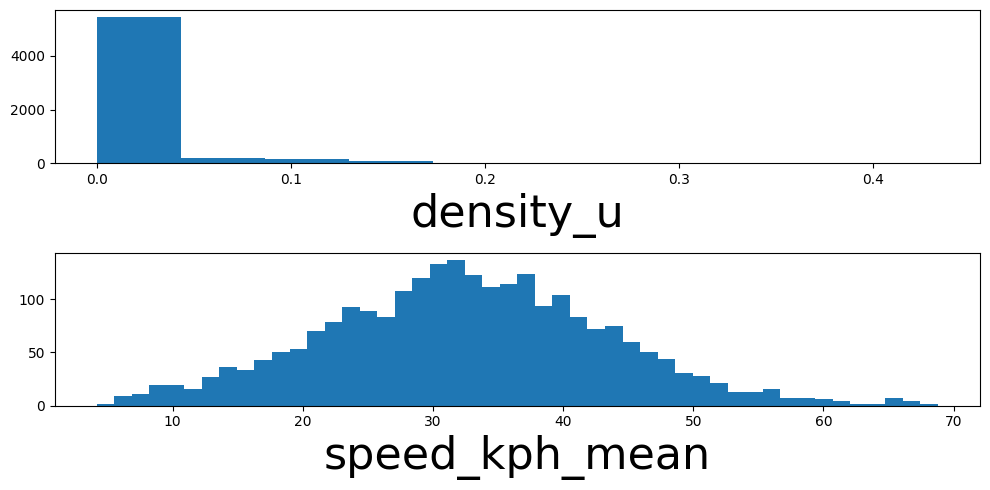

In [54]:
plot_and_stats(gdf_ut_counts_merged, "density_u", "speed_kph_mean")

#### density full area t4c

density_t                                                    \
                   count      mean    median       min       max       std   
highway                                                                      
motorway              16  0.918750  0.928571  0.814286  0.985714  0.055871   
motorway_link          3  0.909524  0.942857  0.800000  0.985714  0.097241   
trunk                 56  0.967347  0.985714  0.757143  1.000000  0.055276   
trunk_link            44  0.974351  0.985714  0.814286  1.000000  0.038057   
primary              709  0.744328  0.828571  0.071429  1.000000  0.232660   
primary_link         216  0.827116  0.900000  0.114286  1.000000  0.178460   
secondary           1278  0.650581  0.671429  0.085714  1.000000  0.201087   
secondary_link        92  0.637733  0.685714  0.128571  1.000000  0.223477   
tertiary            2014  0.497645  0.485714  0.028571  1.000000  0.215817   
tertiary_link        130  0.638242  0.671429  0.100000  1.000000  0.229712   
unclassified          20  0.402857  0.314286  0.114286  0.957143  0.269247   
residential         1341  0.400533  0.371429  0.014286  1.000000  0.219416   
living_street         24  0.397024  0.157143  0.000000  0.900000  0.344921   

               median_speed_kph                                    ...  \
                           mean     median        min         max  ...   
highway                                                            ...   
motorway              84.590686  96.941176  42.823529  106.352941  ...   
motorway_link         73.490196  77.176471  59.058824   84.235294  ...   
trunk                 70.727941  72.941176  21.176471  114.823529  ...   
trunk_link            68.187983  71.176471  16.000000  111.294118  ...   
primary               33.647672  32.647059   1.411765   89.882353  ...   
primary_link          34.936607  31.647059   1.882353   94.352941  ...   
secondary             31.664457  29.607843   0.235294  119.294118  ...   
secondary_link        36.924268  31.352941   6.000000  113.882353  ...   
tertiary              31.791556  27.764706   0.156863  118.588235  ...   
tertiary_link         29.004374  25.882353   1.882353   80.705882  ...   
unclassified          37.900000  31.058824   2.352941  107.764706  ...   
residential           27.030043  22.117647   0.235294  117.176471  ...   
living_street         19.040637  14.562092   1.882353   90.823529  ...   

               speed_kph                         length_meters              \
                  median   min    max        std          mean      median   
highway                                                                      
motorway            90.0  80.0  120.0  10.954451    225.766332  133.156994   
motorway_link       60.0  50.0   60.0   5.773503    202.830347  196.906729   
trunk               80.0  60.0  100.0   6.440742    212.769982  130.620254   
trunk_link          57.4  40.0   80.0   9.947162    122.548649   90.083563   
primary             50.0  20.0   60.0   2.482510     83.534679   68.965140   
primary_link        50.0  20.0   80.0   7.303465     71.612674   44.503463   
secondary           50.0  30.0   60.0   1.467789     86.792288   68.023448   
secondary_link      50.0  30.0   50.0   3.220432     52.331917   32.110282   
tertiary            50.0  20.0   80.0   2.635472     73.071403   56.040118   
tertiary_link       50.0  30.0   50.0   2.994365     67.622854   33.399734   
unclassified        41.4  30.0   50.0   6.007530     89.901753   48.084164   
residential         38.6  10.0   50.0   5.425514     77.802693   65.454108   
living_street       16.3  10.0   30.0   7.803581     68.646235   63.182155   

                                                   sort_key  
                      min          max         std           
highway                                                      
motorway        24.177125   667.905086  223.501683        0  
motorway_link   75.856949   335.727361  130.036436        1  
trunk            5.661

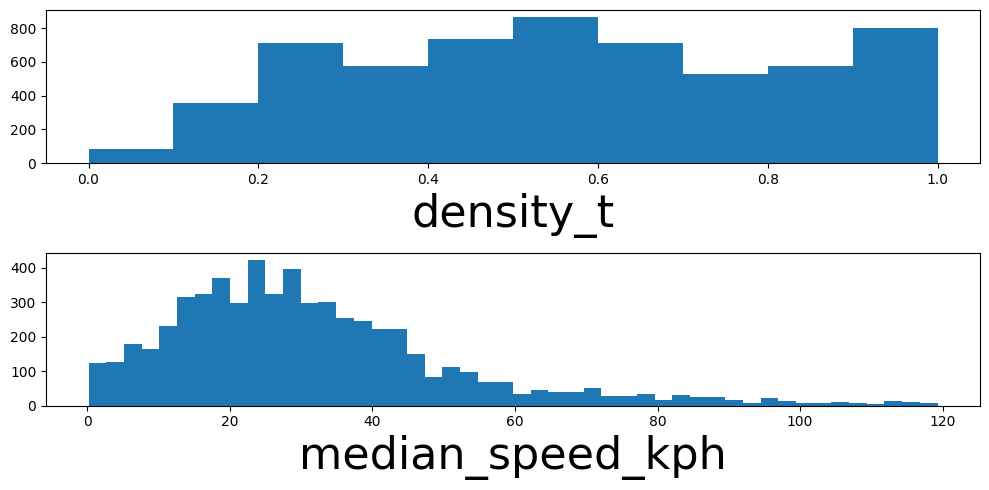

In [55]:
plot_and_stats(gdf_ut_counts_merged, "density_t", "median_speed_kph")

### density within bounding box

<AxesSubplot: xlabel='highway', ylabel='density'>

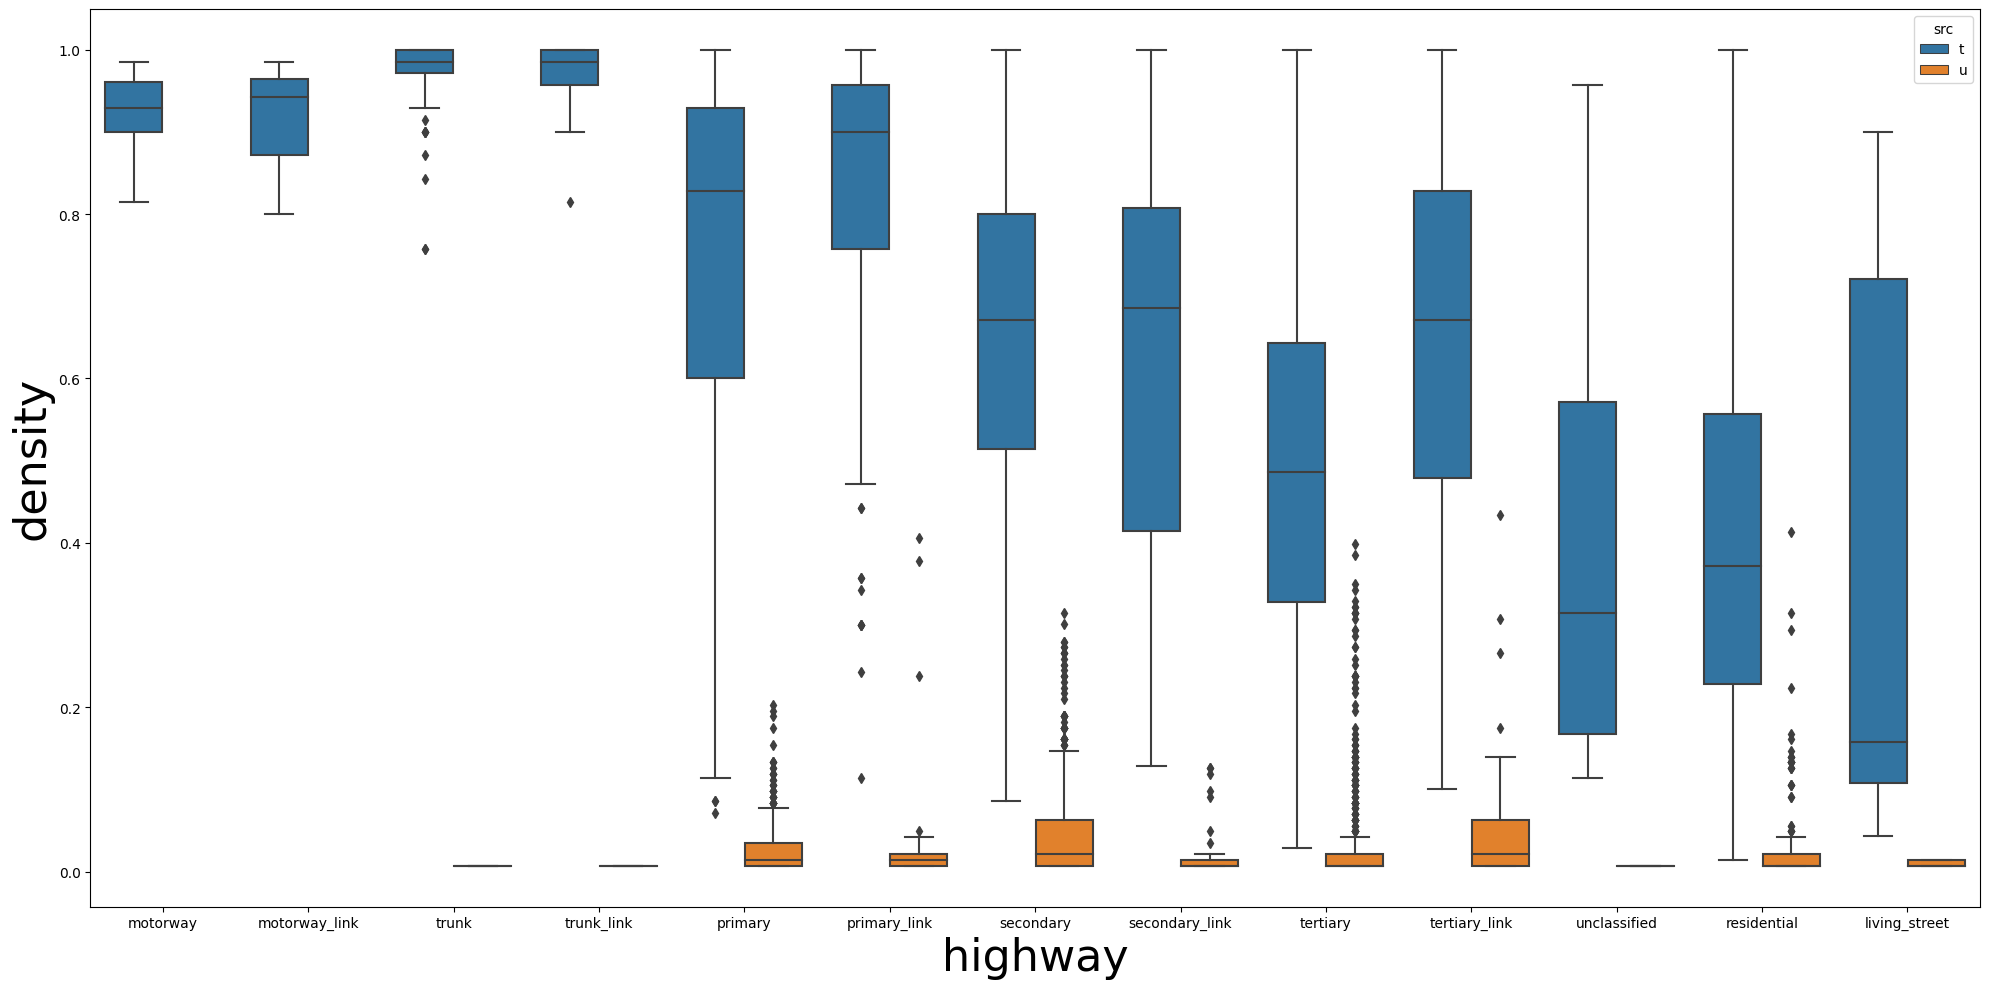

In [56]:
fig, ax = plt.subplots(1, figsize=(20, 10), tight_layout=True)
sns.boxplot(counts_all[counts_all["in_bb"] == True], x="highway", y="density", hue="src", ax=ax)

#### density bounding box Uber

density_u                                               \
                   count      mean    median  min       max       std   
highway                                                                 
motorway              16  0.000000  0.000000  0.0  0.000000  0.000000   
motorway_link          3  0.000000  0.000000  0.0  0.000000  0.000000   
trunk                 56  0.001249  0.000000  0.0  0.006993  0.002703   
trunk_link            44  0.000159  0.000000  0.0  0.006993  0.001054   
primary              709  0.017044  0.006993  0.0  0.202797  0.029273   
primary_link         216  0.012691  0.000000  0.0  0.405594  0.041431   
secondary           1278  0.027107  0.006993  0.0  0.314685  0.048163   
secondary_link        92  0.010566  0.000000  0.0  0.125874  0.025741   
tertiary            2014  0.012049  0.000000  0.0  0.398601  0.040516   
tertiary_link        130  0.025229  0.000000  0.0  0.433566  0.059437   
unclassified          20  0.001049  0.000000  0.0  0.006993  0.002562   
residential         1341  0.006425  0.000000  0.0  0.412587  0.024310   
living_street         24  0.004079  0.000000  0.0  0.013986  0.005423   

               speed_kph_mean                           ... speed_kph        \
                         mean   median     min     max  ...    median   min   
highway                                                 ...                   
motorway                  NaN      NaN     NaN     NaN  ...      90.0  80.0   
motorway_link             NaN      NaN     NaN     NaN  ...      60.0  50.0   
trunk               65.865500  65.8920  61.935  68.795  ...      80.0  60.0   
trunk_link          57.055000  57.0550  57.055  57.055  ...      57.4  40.0   
primary             37.717107  38.2040   4.178  67.279  ...      50.0  20.0   
primary_link        31.051412  31.2715   7.084  51.901  ...      50.0  20.0   
secondary           33.689078  34.1740   5.055  65.376  ...      50.0  30.0   
secondary_link      31.836667  31.6550   9.058  50.352  ...      50.0  30.0   
tertiary            31.232502  30.4830   6.131  61.479  ...      50.0  20.0   
tertiary_link       28.894000  29.4505   5.755  47.608  ...      50.0  30.0   
unclassified        59.331667  56.9670  53.025  68.003  ...      41.4  30.0   
residential         27.384196  27.4460   6.285  55.862  ...      38.6  10.0   
living_street       17.950000  17.0315   8.346  26.247  ...      16.3  10.0   

                                 length_meters                         \
                  max        std          mean      median        min   
highway                                                                 
motorway        120.0  10.954451    225.766332  133.156994  24.177125   
motorway_link    60.0   5.773503    202.830347  196.906729  75.856949   
trunk           100.0   6.440742    212.769982  130.620254   5.661998   
trunk_link       80.0   9.947162    122.548649   90.083563  18.189738   
primary          60.0   2.482510     83.534679   68.965140   2.046653   
primary_link     80.0   7.303465     71.612674   44.503463   2.692792   
secondary        60.0   1.467789     86.792288   68.023448   2.940861   
secondary_link   50.0   3.220432     52.331917   32.110282   0.552173   
tertiary         80.0   2.635472     73.071403   56.040118   2.327827   
tertiary_link    50.0   2.994365     67.622854   33.399734   2.700348   
unclassified     50.0   6.007530     89.901753   48.084164   6.951420   
residential      50.0   5.425514     77.802693   65.454108   2.292579   
living_street    30.0   7.803581     68.646235   63.182155   5.790529   

                                        sort_key  
                        max         std           
highway                                           
motorway         667.905086  223.501683        0  
motorway_link    335.727361  130.036436        1  
trunk            958.371536  202.416058        2  
trunk_link       509.309932  102.916686        3  
primary         1021.023532   78.426660        4  
prim

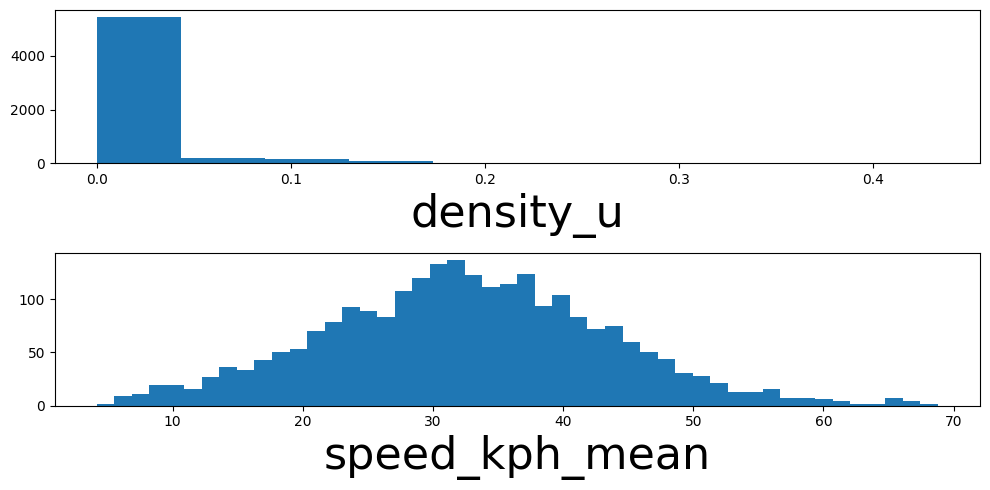

In [57]:
plot_and_stats(gdf_ut_counts_merged[gdf_ut_counts_merged["in_bb"] == True], "density_u", "speed_kph_mean")

#### density bounding box t4c

density_t                                                    \
                   count      mean    median       min       max       std   
highway                                                                      
motorway              16  0.918750  0.928571  0.814286  0.985714  0.055871   
motorway_link          3  0.909524  0.942857  0.800000  0.985714  0.097241   
trunk                 56  0.967347  0.985714  0.757143  1.000000  0.055276   
trunk_link            44  0.974351  0.985714  0.814286  1.000000  0.038057   
primary              709  0.744328  0.828571  0.071429  1.000000  0.232660   
primary_link         216  0.827116  0.900000  0.114286  1.000000  0.178460   
secondary           1278  0.650581  0.671429  0.085714  1.000000  0.201087   
secondary_link        92  0.637733  0.685714  0.128571  1.000000  0.223477   
tertiary            2014  0.497645  0.485714  0.028571  1.000000  0.215817   
tertiary_link        130  0.638242  0.671429  0.100000  1.000000  0.229712   
unclassified          20  0.402857  0.314286  0.114286  0.957143  0.269247   
residential         1341  0.400533  0.371429  0.014286  1.000000  0.219416   
living_street         24  0.397024  0.157143  0.000000  0.900000  0.344921   

               median_speed_kph                                    ...  \
                           mean     median        min         max  ...   
highway                                                            ...   
motorway              84.590686  96.941176  42.823529  106.352941  ...   
motorway_link         73.490196  77.176471  59.058824   84.235294  ...   
trunk                 70.727941  72.941176  21.176471  114.823529  ...   
trunk_link            68.187983  71.176471  16.000000  111.294118  ...   
primary               33.647672  32.647059   1.411765   89.882353  ...   
primary_link          34.936607  31.647059   1.882353   94.352941  ...   
secondary             31.664457  29.607843   0.235294  119.294118  ...   
secondary_link        36.924268  31.352941   6.000000  113.882353  ...   
tertiary              31.791556  27.764706   0.156863  118.588235  ...   
tertiary_link         29.004374  25.882353   1.882353   80.705882  ...   
unclassified          37.900000  31.058824   2.352941  107.764706  ...   
residential           27.030043  22.117647   0.235294  117.176471  ...   
living_street         19.040637  14.562092   1.882353   90.823529  ...   

               speed_kph                         length_meters              \
                  median   min    max        std          mean      median   
highway                                                                      
motorway            90.0  80.0  120.0  10.954451    225.766332  133.156994   
motorway_link       60.0  50.0   60.0   5.773503    202.830347  196.906729   
trunk               80.0  60.0  100.0   6.440742    212.769982  130.620254   
trunk_link          57.4  40.0   80.0   9.947162    122.548649   90.083563   
primary             50.0  20.0   60.0   2.482510     83.534679   68.965140   
primary_link        50.0  20.0   80.0   7.303465     71.612674   44.503463   
secondary           50.0  30.0   60.0   1.467789     86.792288   68.023448   
secondary_link      50.0  30.0   50.0   3.220432     52.331917   32.110282   
tertiary            50.0  20.0   80.0   2.635472     73.071403   56.040118   
tertiary_link       50.0  30.0   50.0   2.994365     67.622854   33.399734   
unclassified        41.4  30.0   50.0   6.007530     89.901753   48.084164   
residential         38.6  10.0   50.0   5.425514     77.802693   65.454108   
living_street       16.3  10.0   30.0   7.803581     68.646235   63.182155   

                                                   sort_key  
                      min          max         std           
highway                                                      
motorway        24.177125   667.905086  223.501683        0  
motorway_link   75.856949   335.727361  130.036436        1  
trunk            5.661

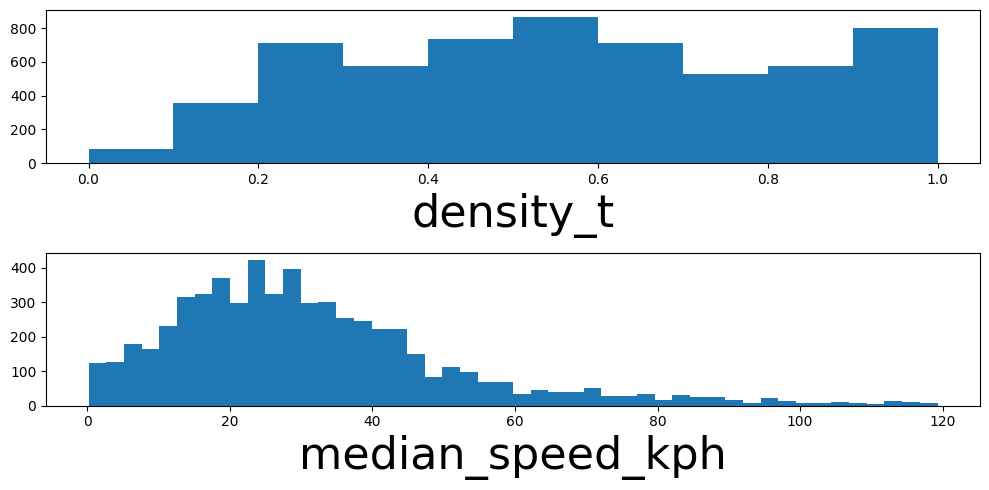

In [58]:
plot_and_stats(gdf_ut_counts_merged[gdf_ut_counts_merged["in_bb"] == True], "density_t", "median_speed_kph")

### Density and speeds for matched edges

In [59]:
# more fishy...

In [60]:
counts_all[(counts_all["matching"] == True) & ((counts_all["src"] == "t"))]

,u,v,gkey,count,speed,density,src,mean_volume,osmid,speed_kph,...,name,node_id,x_u,y_u,node_id_v,x_v,y_v,in_bb,sort_key,matching
5478,208606457,2518375292,208606457_2518375292_294713039,64,49.411765,0.914286,t,5.123698,294713039,80.0,...,Autovia de Castelldefels,208606457,2.101067,41.339122,2518375292,2.100841,41.338940,True,0,True
8004,4353325973,206343940,4353325973_206343940_19918156,65,95.058824,0.928571,t,5.370513,19918156,120.0,...,,4353325973,2.022884,41.301636,206343940,2.020845,41.299651,True,0,True
7663,2518375292,2518375257,2518375292_2518375257_294713039,65,42.823529,0.928571,t,4.308974,294713039,80.0,...,Autovia de Castelldefels,2518375292,2.100841,41.338940,2518375257,2.099516,41.337985,True,0,True
5480,209106801,4207764297,209106801_4207764297_420883156,65,100.941176,0.928571,t,2.275641,420883156,90.0,...,,209106801,2.002229,41.288638,4207764297,2.001859,41.288403,True,0,True
7661,2518375257,242934134,2518375257_242934134_294713039,63,43.529412,0.900000,t,2.226190,294713039,80.0,...,Autovia de Castelldefels,2518375257,2.099516,41.337985,242934134,2.099175,41.337724,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,442540236,442540237,442540236_442540237_116343002,60,4.705882,0.857143,t,13.865278,116343002,10.0,...,Passeig de Gràcia (laterals),442540236,2.166131,41.391416,442540237,2.165009,41.392281,True,12,True
6252,428026360,428026365,428026360_428026365_36823248,3,90.823529,0.042857,t,2.666667,36823248,16.3,...,Carrer del Rellotge,428026360,2.220550,41.448598,428026365,2.220063,41.448921,True,12,True
7158,1377225863,30553972,1377225863_30553972_123527841,8,31.058824,0.114286,t,3.375000,123527841,16.3,...,Carrer de Sant Lluís,1377225863,2.159381,41.404853,30553972,2.159425,41.404882,True,12,True
7852,3236553582,442540239,3236553582_442540239_116343002,57,10.823529,0.814286,t,6.989766,116343002,10.0,...,Passeig de Gràcia (laterals),3236553582,2.163122,41.393843,442540239,2.162863,41.394052,True,12,True


In [61]:
counts_all[(counts_all["matching"] == True) & ((counts_all["src"] == "u"))]

,u,v,gkey,count,speed,density,src,mean_volume,osmid,speed_kph,...,name,node_id,x_u,y_u,node_id_v,x_v,y_v,in_bb,sort_key,matching
1872,312898582,92620243,312898582_92620243_78845358,1,66.566,0.006993,u,NaN,78845358,80.0,...,Ronda Litoral,312898582,2.225550,41.417804,92620243,2.225262,41.418538,True,2,True
1446,191065458,92620219,191065458_92620219_28482420,1,66.345,0.006993,u,NaN,28482420,80.0,...,Ronda Litoral,191065458,2.225593,41.416121,92620219,2.225660,41.416559,True,2,True
1442,191046032,191046034,191046032_191046034_18522478,1,61.935,0.006993,u,NaN,18522478,80.0,...,Ronda Litoral (Nus de la Trinitat),191046032,2.201787,41.448234,191046034,2.200909,41.448753,True,2,True
3017,923477788,191046093,923477788_191046093_34304305,1,68.795,0.006993,u,NaN,34304305,80.0,...,Ronda Litoral,923477788,2.203618,41.446487,191046093,2.203115,41.447038,True,2,True
1272,92620219,312898582,92620219_312898582_78845282,1,66.059,0.006993,u,NaN,78845282,80.0,...,Ronda Litoral,92620219,2.225660,41.416559,312898582,2.225550,41.417804,True,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,413753732,359693529,413753732_359693529_135703116,1,17.189,0.006993,u,NaN,135703116,16.3,...,Carrer de Mossen Cinto Verdaguer,413753732,2.219340,41.449927,359693529,2.218675,41.449449,True,12,True
2192,413753171,413753732,413753171_413753732_526568089,2,13.941,0.013986,u,NaN,526568089,16.3,...,Carrer de Wagner,413753171,2.219852,41.450353,413753732,2.219340,41.449927,True,12,True
4789,5301259039,413753171,5301259039_413753171_548762349,2,16.087,0.013986,u,NaN,548762349,30.0,...,Carrer de Wagner,5301259039,2.220328,41.450744,413753171,2.219852,41.450353,True,12,True
2004,359693529,428026361,359693529_428026361_545050312,1,19.716,0.006993,u,NaN,545050312,20.0,...,Carrer de Mossen Cinto Verdaguer,359693529,2.218675,41.449449,428026361,2.218225,41.449231,True,12,True


<AxesSubplot: xlabel='highway', ylabel='density'>

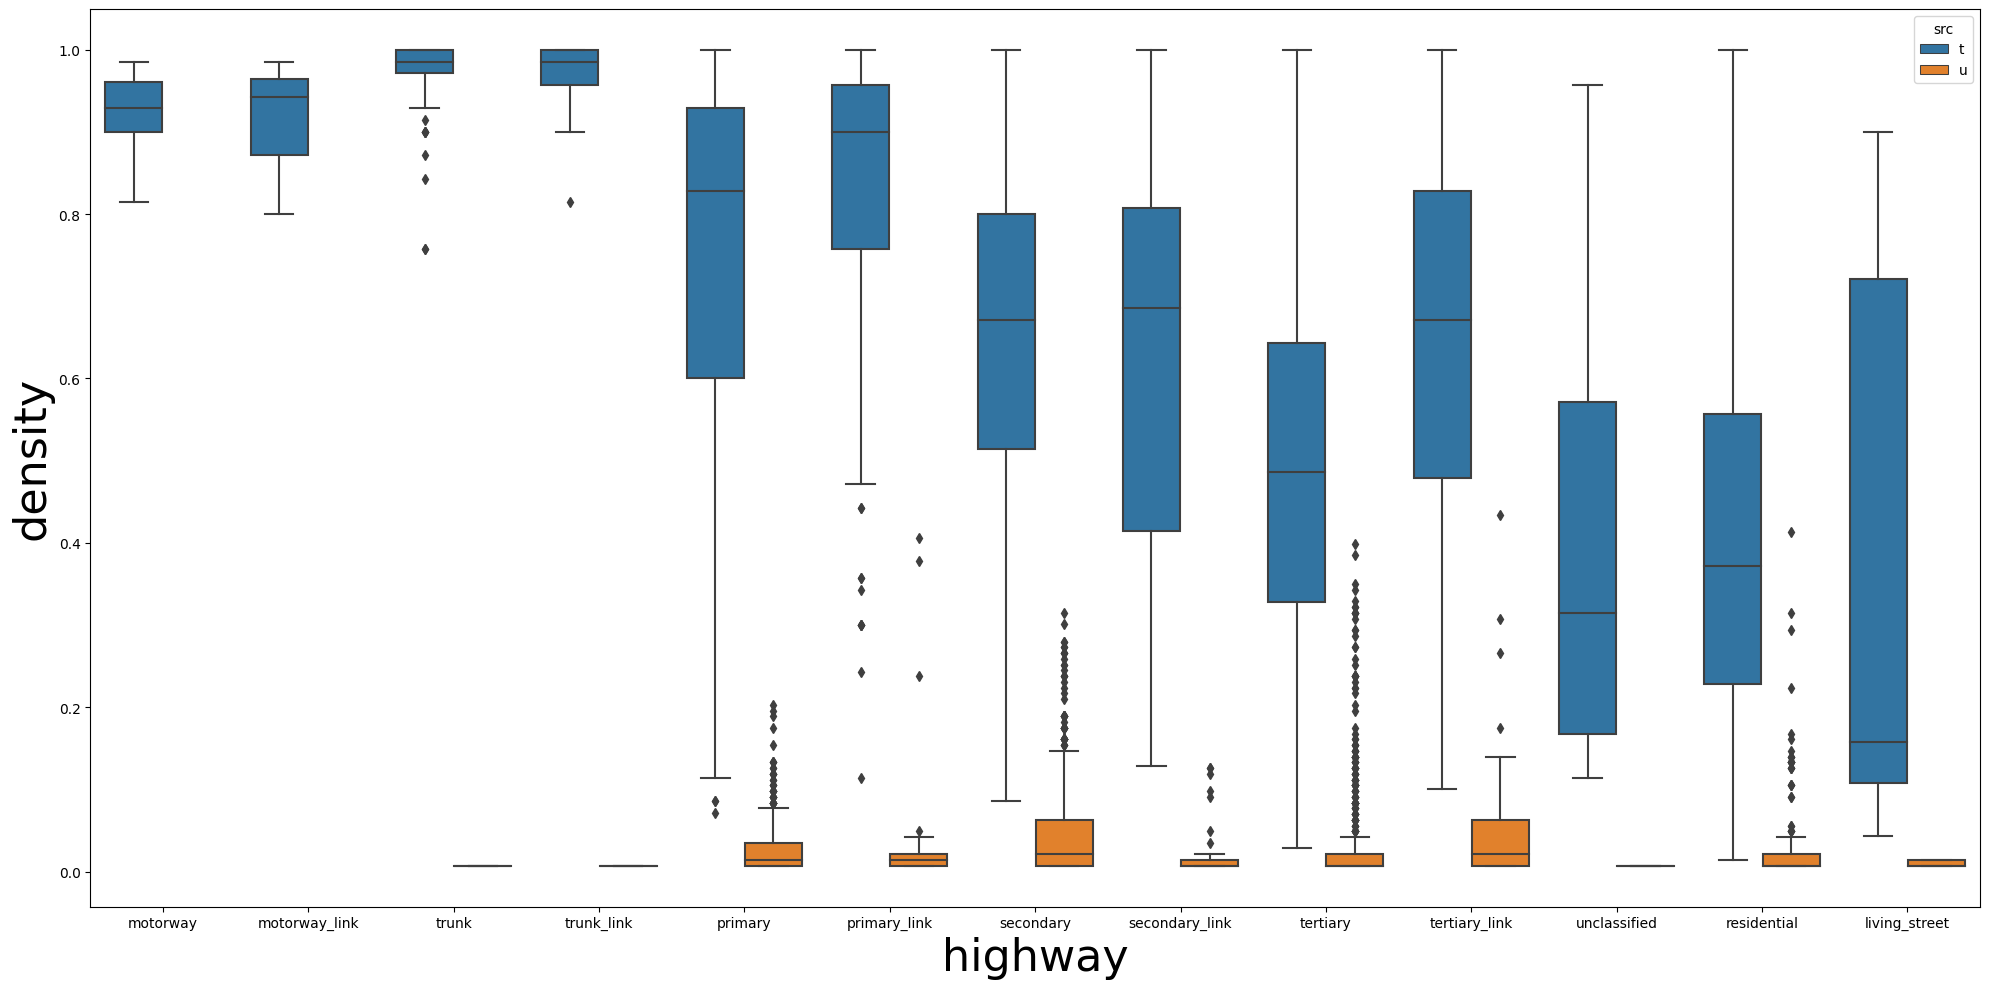

In [62]:
fig, ax = plt.subplots(1, figsize=(20, 10), tight_layout=True)
sns.boxplot(counts_all[counts_all["matching"] == True], x="highway", y="density", hue="src", ax=ax)

<AxesSubplot: xlabel='highway', ylabel='speed'>

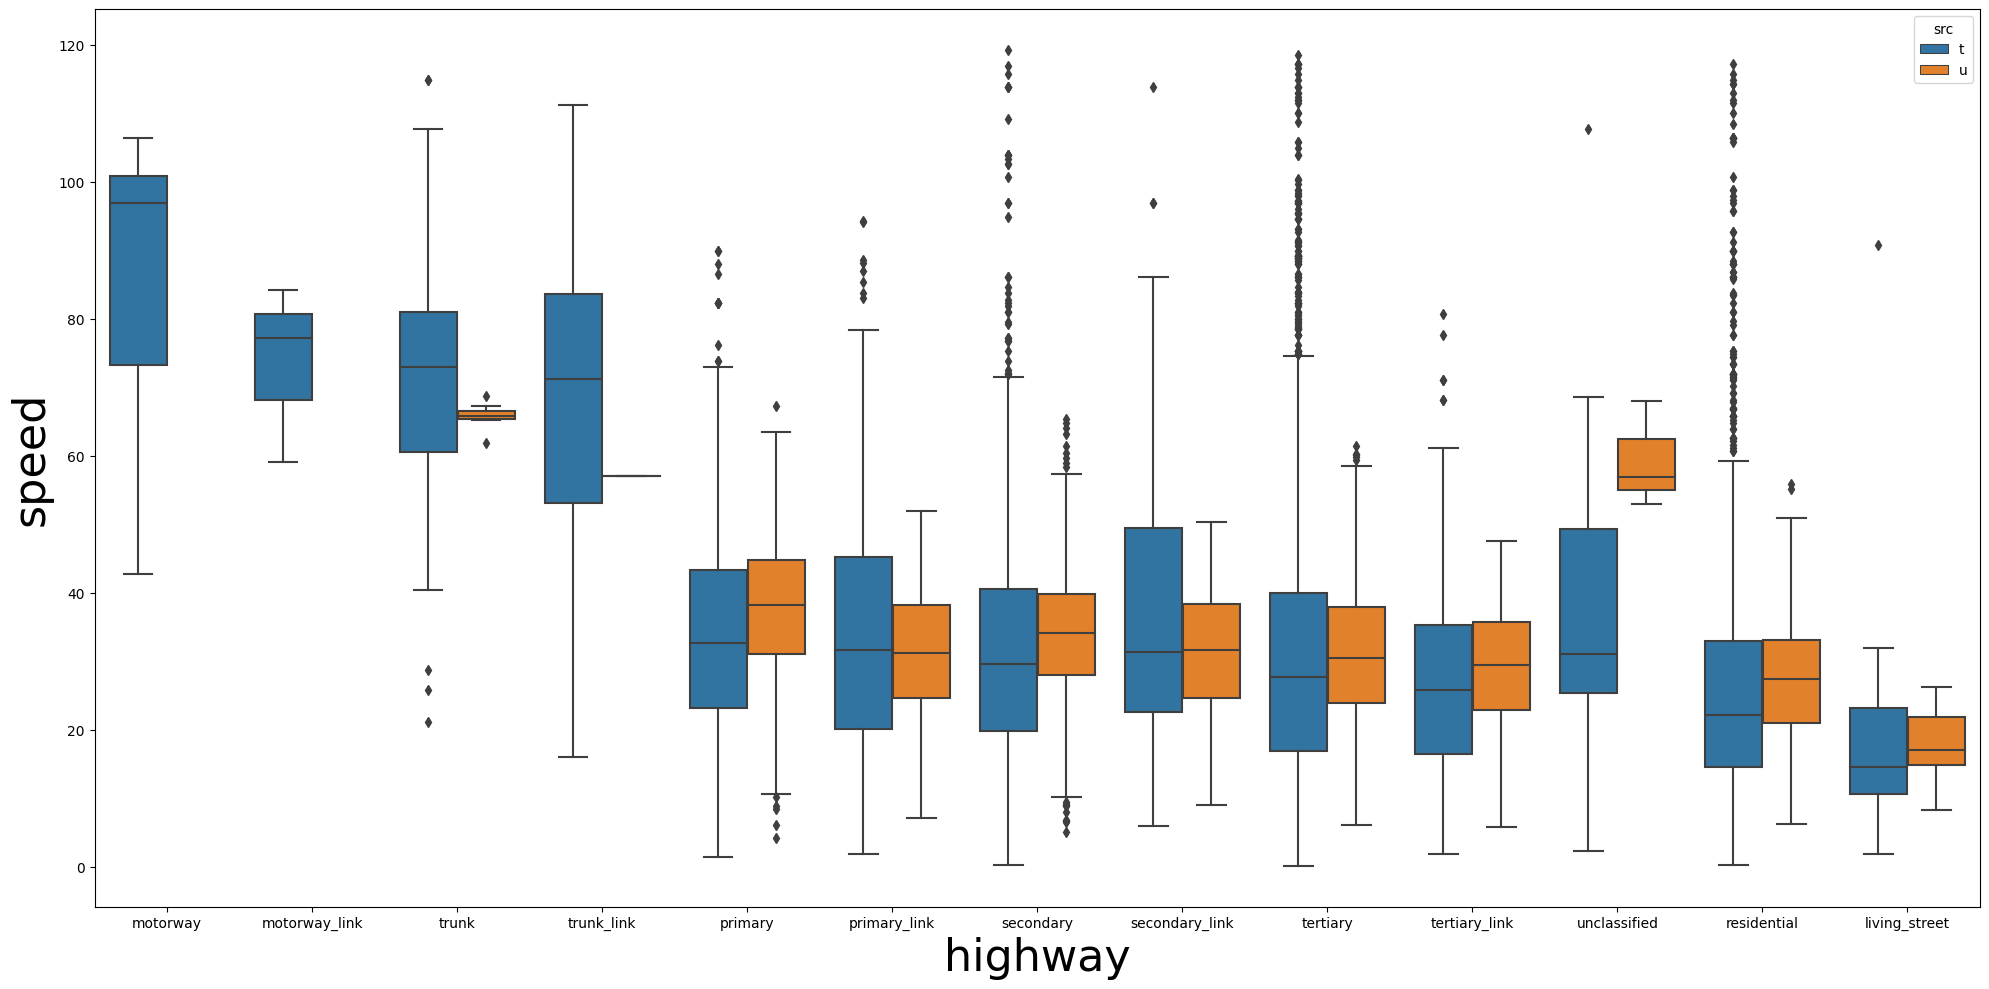

In [63]:
fig, ax = plt.subplots(1, figsize=(20, 10), tight_layout=True)
sns.boxplot(counts_all[counts_all["matching"] == True], x="highway", y="speed", hue="src", ax=ax)